# 机器学习中常用的优化算法

优化算法通常是指求最大值或最小值的算法。

## 多元函数的极值

高数中是这样定义多元函数的极值：

设函数$z = f(x,y)$的定义域为 D，$P_0(x_0,y_0)$ 为D的内点，若存在$P_0$的某个邻域$U(P_0) \subset D$，如果对于该邻域内任何异于$P_0$的点$(x,y)$，都有$f(x,y) < f(x_0,y_0)$ （或 $f(x,y) > f(x_0,y_0)$ )，则称函数f(x)在点P0有极大值或极小值。

例如：

1. $z = 3x^2+4y^2$在点(0,0)处有极小值。因为z(0,0)=0，而z在非（0，0）点时，z>0。
2. $z = - \sqrt{x^2+y^2}$在（0，0）处有极大值。
3. z=xy在点(0,0)处既不取得最大值也不取得最小值，因为在这点附近，z既有为正的值，也有为负的值。



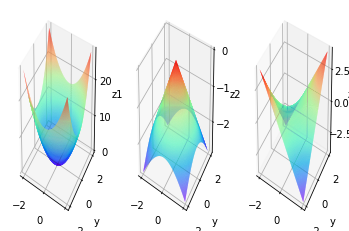

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
import mpl_toolkits.mplot3d

x, y = np.mgrid[-2:2:0.01, -2:2:0.01]


z1=(3*x**2 + 4* y**2)
ax1 = plt.subplot(131, projection='3d') 
ax1.plot_surface(x, y, z1, rstride=1, cstride=1, cmap='rainbow', alpha=0.9)#绘面
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z1')

z2= -(np.sqrt(x**2 +y**2))
ax2 = plt.subplot(132, projection='3d') 
ax2.plot_surface(x, y, z2, rstride=1, cstride=1, cmap='rainbow', alpha=0.9)#绘面
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z2')

z3=(x*y)
ax3 = plt.subplot(133, projection='3d') 
ax3.plot_surface(x, y, z3, rstride=1, cstride=1, cmap='rainbow', alpha=0.9)#绘面
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z3')
plt.show()

### 定理1（必要条件）

设函数$z=f(x,y)$在点$(x_0,y_0)$具有偏导数，且在点$(x_0,y_0)$处有极值，则有：

$f_x(x_0,y_0) = 0, f_y(x_0,y_0) = 0$

从几何上看，这时如果曲面$z=f(x,y)$在点$(x_0,y_0,z_0)$处有切平面，则切平面：

$z - z_0 = f_x(x_0,y_0)(x- x_0) + f_y(x_0,y_0)(y-y_0)$为平行于XOY坐标平面的平面$z=z_0$

### 驻点

凡是能使$f_x(x_0,y_0) = 0 ,f_y(x_0,y_0)=0$同时成立的点$(x_0,y_0)$称为函数$z=f(x,y)$的驻点。

**凡是具有偏导数的函数的极值点，必定是驻点；反之，驻点不一定是极值点。**例如，z=xy在点（0，0）两个偏导数都是0，点（0，0）对z=xy是驻点，但不是极值点。

### 定理2（充分条件）

设函数$z=f(x,y)$在点$(x_0,y_0)$的某个邻域内连续且具有一阶及二阶连续偏导数，又

$f_x(x_0,y_0) = 0, f_y(x_0,y_0) = 0$

令 $f_{xx}(x_0,y_0) = A, f_{xy}(x_0,y_0) = B,f_{yy}(x_0,y_0) = C$

则$z=f(x,y)$在点$(x_0,y_0)$处是否取得极值的条件如下：

（1）$AC-B^2 > 0$时具有极值，且当$A<0$时有极大值，当$A>0$时有极小值；

（2）$AC-B^2 < 0$时具没有极值；

（3）$AC-B^2 = 0$时可能有极值，也可能没有极值。

这个定理的证明需要用二元泰勒公式。

### 极值求法

结合定理1和定理2，有以下求法：

第一步：解方程组$f_x(x,y) = 0,f_y(x,y) = 0$，求得一切实数解，即可得一切驻点。

第二步：对于每个驻点，按 $f_{xx}(x_0,y_0) = A, f_{xy}(x_0,y_0) = B,f_{yy}(x_0,y_0) = C$，求出A、B、C；

第三步：定出$AC-B^2 $的符号，按照定理2的结论判定$f(x_0,y_0)是否极值，是极大值还是极小值？$。


### 多元函数的最大值、最小值

如果$f(x,y)$在有界闭区间D上连续，则$f(x,y)$在D上必定能取得最大值和最小值。

假定函数在D上连续、在D内可微分且只有有限个驻点，如果函数在D得内部取得最大值（最小值），那么这个最大值(最小值)也是函数的极大值（极小值）。

求最大值和最小值的一般方法：

将函数f(x,y)在D内的所有驻点处的函数值及在D的边界上的最大值和最小值相互比较，其中最大的就是最大值，最小的就是最小值。


## 条件极值

函数$z = f(x,y)$在条件$\varphi(x,y) = 0$ 下取得极值的必要条件：

**如果函数$z = f(x,y)$在点$(x_0,y_0)$取得所求的极值，则$\varphi(x_0,y_0) = 0$**

假定在$(x_0,y_0)$的某一邻域内$f(x,y)与\varphi(x,y)$均有连续的一阶偏导数，而$\varphi_y(x_0,y_0) \neq 0$.由隐函数存在定理，由方程$\varphi(x,y) = 0$确定一个连续且具有连续导数的函数$y=\psi(x)$，将其代入目标函数$z = f(x,y)$，得到一元函数$z=f(x,\psi(x))$。

$x=x_0$是一元函数$z = f(x,\psi(x))$的极值点。由取得极值的必要条件，有

$\frac{dz}{dx}|_{x=x_0} = f_x(x_0,y_0) +f_y(x_0,y_0)\frac{dy}{dx}|_{x=x_0} = 0$

即

$\frac{dz}{dx}|_{x=x_0} = f_x(x_0,y_0) - f_y(x_0,y_0)\frac{\varphi_x(x_0,y_0)}{\varphi_y(x_0,y_0)} = 0$

设

$ \frac{f_x(x_0,y_0)}{\varphi_y(x_0,y_0)} = - \lambda$,则函数$z = f(x,y)$在条件$\varphi(x,y) = 0$下在$(x_0,y_0)$取得极值的必要条件是：

$$\left\{
\begin{aligned}
f_x(x_0,y_0) + \lambda \varphi_x(x_0,y_0) = 0  \\
f_y(x_0,y_0) + \lambda \varphi_y(x_0,y_0) = 0 \\
\varphi(x_0,y_0) = 0  \\
\end{aligned}
\right. 
$$

**拉格朗日乘子法**

要找函数$z=f(x,y)$在条件$\varphi(x,y) = 0$下的可能极值点，可以先构成辅助函数

$L(x,y) = f(x,y) +\lambda \varphi(x,y)$

其中，$\lambda$是某一常数，然后解方程组：

$$\left\{
\begin{aligned}
L_x(x,y) = f_x(x,y) + \lambda \varphi_x(x,y) = 0  \\
L_y(x,y) = f_y(x,y) + \lambda \varphi_y(x,y) = 0 \\
\varphi(x,y) = 0  \\
\end{aligned}
\right. 
$$

由这方程组解出$x,y,\lambda$，则其中(x,y)就是所要求的可能的极值点。

此方法可以推广到自变量多于两个而条件多于一个的情形。

## 拉格朗日乘子法（Lagrange multipliers）

拉格朗日乘子法是一种寻找多元函数在一组约束下的极值的方法。

通过引入拉格朗日乘子，可将有d个变量与k个约束条件的最优化问题，转化为具有 d+k 个变量的无约束优化问题求解。

> 一般我们遇到比较简单一点问题的可能就是等式约束，但是稍微复杂一点的题目都会涉及到不等式约束，所以，这个时候就要根据实际情况选取不同的方法咯。一般情况下，最优化问题会有三类：

> 无约束条件 ：这种情况想都不用想，直接对变量求导等于0，代入原函数验证即可。

>  等式约束条件：通过构造拉格朗日函数，求解偏导数=0即可。

> 不等式约束相比于等式约束，要复杂一点，而且通常情况下，不等式约束和等式约束总喜欢一起出现，在这里，为了更好的解决该问题，除了拉格朗日乘子外，我们引入了KKT条件。


先考虑一个等式约束的优化问题：假设 x 为 d 维向量，欲寻找 x 的某个取值 $x^*$，使目标函数 $f(x)$最小且同时满足$g(x) = 0$ 的约束。从几何角度看，该问题的目标使在由方程 $g(x) = 0$确定的 $d-1$ 维曲面上寻找能使目标函数 $f(x)$最小化的点。此时，不难得到如下结论：

- 对于约束曲面上的任意点x，该点的梯度 $\triangledown g(x)$ 正交于约束曲面；

- 在最优点 $x^*$，目标函数在该点的梯度 $\triangledown f(x^*)$ 正交于约束曲面。

由此可知，在最优点 $x^*$，如下图所示：

![拉格朗日乘子法的几何意义](images/math/拉格朗日乘子法的几何意义.png)

梯度 $\triangledown g(x)$ 和  $\triangledown f(x)$ 的方向比相同或相反，即存在 $ \lambda \neq 0$，使得：

$ \triangledown f(x^* ) + \lambda \triangledown g(x^* ) = 0$  ——式（1）

$\lambda$ 称为拉格朗日乘子。定义拉格朗日函数：

$ Y(x, \lambda) = f(x) + \lambda g(x)$ ——式（2）

不难发现，将其对x的偏导数$\triangledown_x L(x,\lambda)$ 置零，即得式（1），同时，将其对 $\lambda$ 的偏导数的偏导数$\triangledown_\lambda L(x,\lambda)$ 置零，即得约束条件$g(x) = 0$.于是，原约束优化问题可转化维对拉个朗日函数$L(x,\lambda)$的无约束优化问题。

现在考虑不等式约束 $g(x) \leq 0$，如上图所示，此时最优点$x^*$或在$g(x) < 0$的区域中，或在边界$g(x) = 0 $ 上。对于$g(x) < 0$ 的情形，约束$g(x) \leq 0$不起作用，可直接通过条件$ \triangledown f(x) = 0$来获得最优点；这等价于$\lambda $置 0，然后对$ \triangledown_x L(x,\lambda)$ 置零得到最优点。$g(x) = 0 $的情形，类似于上面扽是约束的分析，但需要注意的是，此时$ \triangledown f(x^*)$ 的方向必与$ \triangledown g(x^*)$相反，即存在常数 $\lambda > 0$ 使得 $ \triangledown f(x^* ) + \lambda \triangledown g(x^* ) = 0$。整合这两种情形，比满足$\lambda g(x) = 0$。因此，在约束$g(x) \leq 0$ 下最小化f(x)，可转化为在如下约束下最小化式（2）的拉格朗日函数。

$$\left\{
\begin{aligned}
g(x) \leq 0;  \\
\lambda \geq 0;\\
\mu_j g_j(x) = 0;\\
\end{aligned}
\right.  ——式（3）
$$

式（3）称为Karush-Kuhn-Tucker（简称KKT）条件。

### 拉格朗日乘子法求解步骤

#### 构造拉格朗日函数（关键）

$ Y(x, \lambda) = f(x) + \lambda g(x)$ 

或

$$\left\{
\begin{aligned}
g(x) \leq 0;  \\
\lambda \geq 0;\\
\mu_j g_j(x) = 0;\\
\end{aligned}
\right. 
$$


#### 解变量的偏导方程

对每个变量求导，得出的解代入目标函数：

$\frac{\partial F}{\lambda} = 0$，求出$\lambda$;

$\frac{\partial F}{x_i} = 0$, 求出$x_i$

#### 代入目标函数即可

求出$f(x_i) $

为什么这么做可以求解最优化？参考（https://www.cnblogs.com/sddai/p/5728195.html）

维基百科上给出了一个比较好的直观解释。
举个二维最优化的例子：
$ min f(x)$
s.t. $g(x,y) = c$

这里画出z=f(x,y)的等高线（函数登高线定义见百度百科）:

![拉格朗日乘子法的几何意义2](images/math/拉格朗日乘子法的几何意义2.png)

绿线标出的是约束g(x,y)=c的点的轨迹。蓝线是f(x,y)的等高线。箭头表示斜率，和等高线的法线平行。从梯度的方向上来看，显然有d1>d2。绿色的线是约束，也就是说，只要正好落在这条绿线上的点才可能是满足要求的点。如果没有这条约束，f(x,y)的最小值应该会落在最小那圈等高线内部的某一点上。而现在加上了约束，最小值点应该在哪里呢？显然应该是在f(x,y)的等高线正好和约束线相切的位置，因为如果只是相交意味着肯定还存在其它的等高线在该条等高线的内部或者外部，使得新的等高线与目标函数的交点的值更大或者更小，只有到等高线与目标函数的曲线相切的时候，可能取得最优值。
如果我们对约束也求梯度∇g(x,y)，则其梯度如图中绿色箭头所示。很容易看出来，要想让目标函数f(x,y)的等高线和约束相切，则他们切点的梯度一定在一条直线上(f和g的斜率平行)。

　　也即在最优化解的时候：∇f(x,y)=λ（∇g(x,y)-C)    （其中∇为梯度算子; 即：f(x)的梯度 = λ* g(x)的梯度，λ是常数,可以是任何非0实数，表示左右两边同向。）

即：▽[f(x,y)+λ(g(x,y)−c)]=0λ≠0

　　那么拉格朗日函数： F(x,y)=f(x,y)+λ(g(x,y)−c) 在达到极值时与f(x,y)相等，因为F(x,y)达到极值时g(x,y)−c总等于零。

　　min( F(x,λ) )取得极小值时其导数为0，即▽f(x)+▽∑ni=λihi(x)=0，也就是说f(x)和h(x)的梯度共线。

　　简单的说，在F(x,λ)取得最优化解的时候，即F(x,λ)取极值（导数为0，▽[f(x,y)+λ(g(x,y)−c)]=0）的时候，f(x)与g(x) 梯度共线，此时就是在条件约束g(x)下，f(x)的最优化解。

 

## 梯度下降法

梯度下降法（gradient descent）是一种常用的一阶（first-order，即仅使用一阶导数，不使用高阶导数）优化方法，是求解无约束优化问题最简单、最经典的方法之一。

考虑无约束优化问题$min_x f(x)$，其中$f(x)$为连续可微函数，若能构造一个序列$x^0,x^1,x^2,...$ 满足

$f(x^{t+1}) < f(x^t), t = 0,1,2,...$  ——式（grad-1）

则不断执行该过程即可收敛到局部极小点。与满足式（grad-1），根据泰勒展开式有：

$f(x+\Delta x) \simeq f(x) + \Delta x^T \bigtriangledown f(x)$  ——式（grad-2）

于是，欲满足$f(x+\Delta x) < f(x)$，可选择 

$\Delta x = -\gamma \bigtriangledown f(x)$  ——式（grad-3）

其中，步长$\gamma $是一个小常数。这就是梯度下降法。

若目标函数f(x)满足一些条件，则通过选则合适的步长，就能确保通过梯度下降收敛到局部极小点。例如若f(x)满足L-Lipschitz条件，则将补偿设置为1/2L即可确保收敛到局部极小点。当目标函数为凸函数时，局部极小点就对应着函数的全局最小点，此时梯度下降法可确保收敛到全局最优解。

当目标函数f(x)二阶连续可微时，可将式（grad-2）替换位更精确的二阶泰勒展开式，这就得到了牛顿法（newton's method）。牛顿法式典型的二阶方法，其迭代轮数远小于梯度下降法。但牛顿法使用了二阶导数$\bigtriangledown ^2 f(x)$，其每轮迭代中涉及到海森矩阵的求逆，计算复杂度相当高，尤其在高维问题中几乎不可行。若能以较低的计算代价寻找海森矩阵的近似逆矩阵，则可显著降低计算开销，这就是拟牛顿法（quasi-Newton method）。